#Imports

In [33]:
!source venv/bin/activate

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

zsh:source:1: no such file or directory: venv/bin/activate


#Dataset

###Charge dataset

In [34]:
df = pd.read_csv('../data/insurance.csv')
print(f"Dataset shape: {df.shape}")
print(f"Dataset columns: {df.columns}")
df.head()

Dataset shape: (1338, 7)
Dataset columns: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


###Check data types & missing values

In [35]:
info = df.info()
missing_values = df.isnull().sum()
statistics = df.describe(include='all')

print(f"----- Data types ----- \n{info}")
print(f"----- Missing values ----- \n{missing_values}")
print(f"----- Statistics ----- \n{statistics}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
----- Data types ----- 
None
----- Missing values ----- 
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
----- Statistics ----- 
                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast

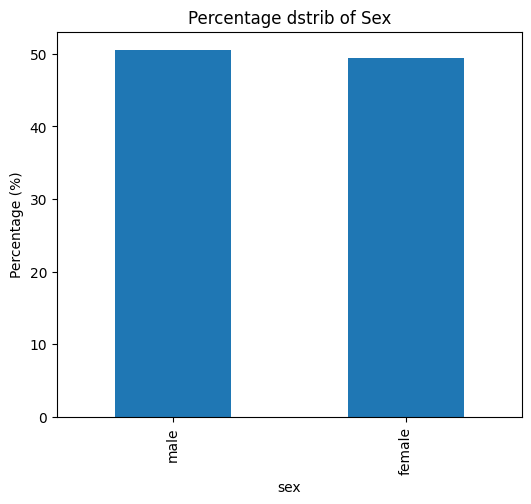

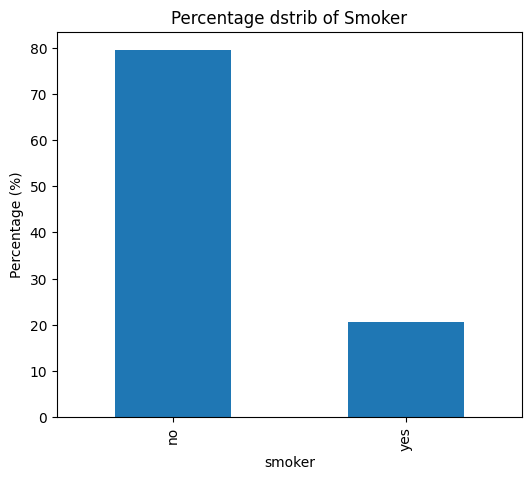

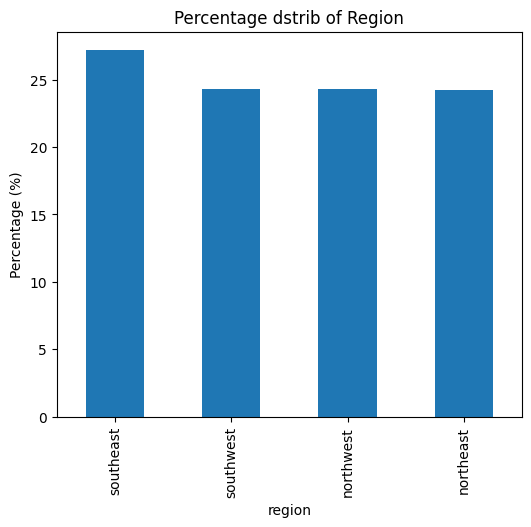

In [36]:
for col in ['sex', 'smoker', 'region']:
    plt.figure(figsize=(6, 5))
    df[col].value_counts(normalize=True).mul(100).plot(kind='bar')
    plt.title(f'Percentage dstrib of {col.capitalize()}')
    plt.ylabel('Percentage (%)')
    plt.show()



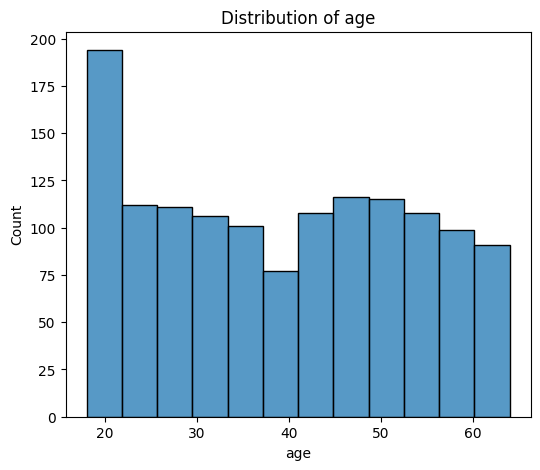

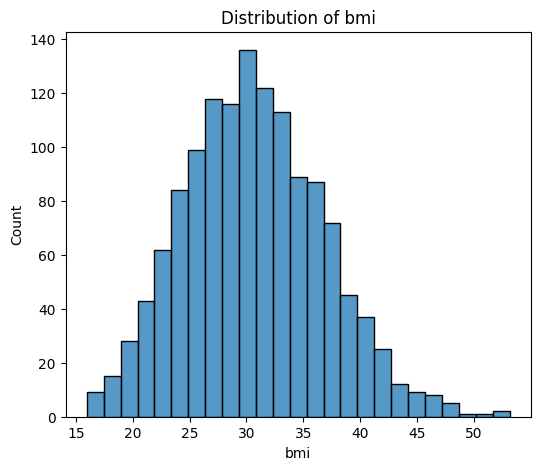

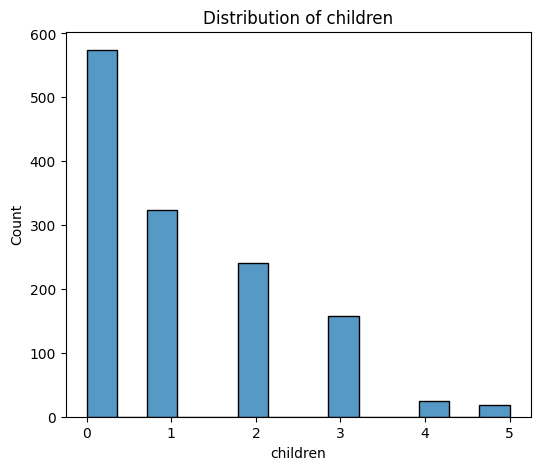

In [38]:
for col in ['age', 'bmi', 'children']:
    plt.figure(figsize=(6, 5))
    sns.histplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()



###Target variable

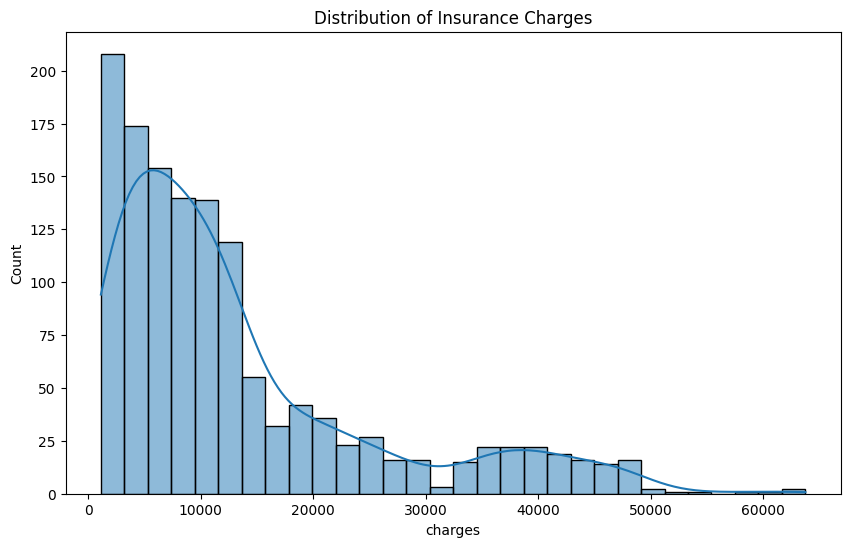

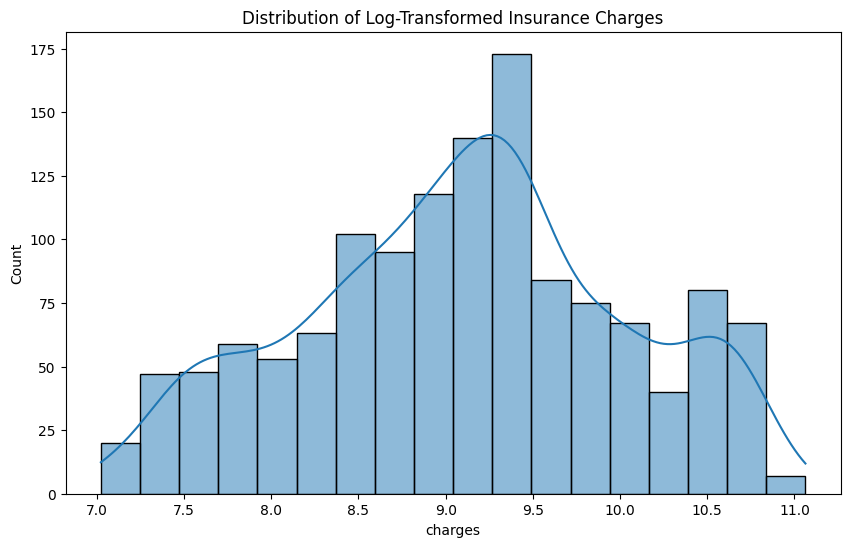

In [40]:
# Target variable distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Insurance Charges')
plt.show()

# Log transformation to check if it's more normally distributed
plt.figure(figsize=(10, 6))
sns.histplot(np.log(df['charges']), kde=True)
plt.title('Distribution of Log-Transformed Insurance Charges')
plt.show()

###Relationships

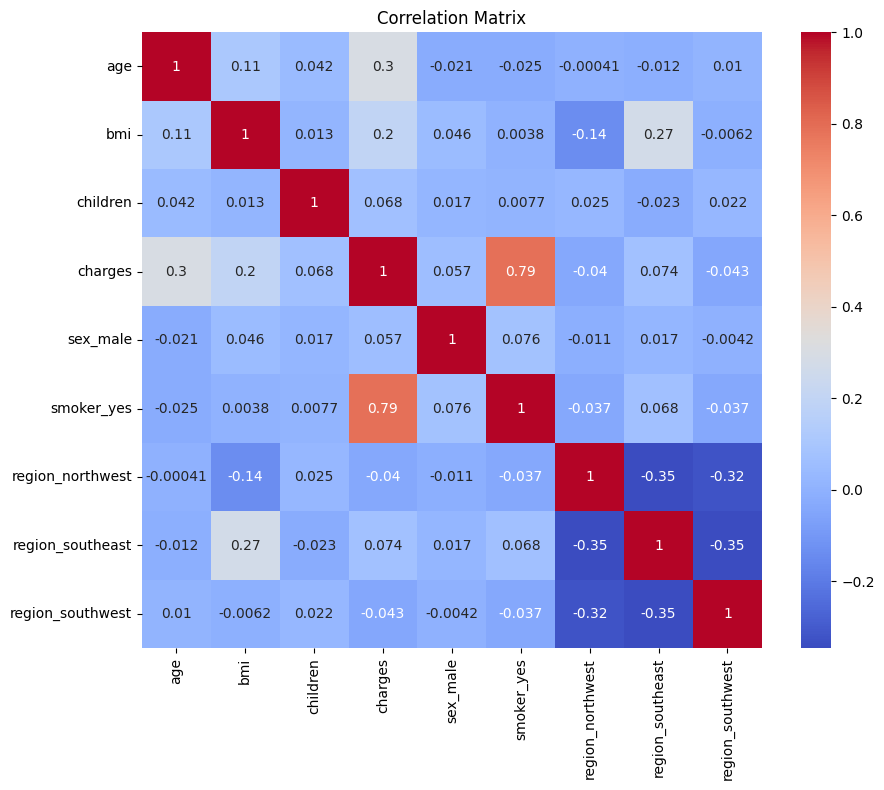

In [45]:
# Create a copy to avoid modifying the original dataframe
df_encoded = df.copy()

# Convert categorical columns to numeric using one-hot encoding
df_encoded = pd.get_dummies(df_encoded, columns=['sex', 'smoker', 'region'], drop_first=True)

# Now calculate correlation
corr = df_encoded.corr()

# Visualize
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

